# Are We Going to Last?
## Predicting Divorce Rates Based on Self Reported Levels of Negative Communication Patterns

**Introduction** - Every newlywed couple has asked themselves at least once: are we going to last? We use the Divorce Prediction Dataset to see how well we can predict whether a couple will get divorced. The dataset contains responses from 150 couples from Turkey on 54 questions about their relationship. The responses are on a  5 point scale (0=Never, 1=Seldom, 2=Averagely, 3=Frequently, 4=Always). 

John Gottman is a renowned psychologist who is widely recognized for his work in martial relationships. His research highlights four major predictors of divorce which he refers to as "Four Horsemen of the Apocalypse" - critcism, contempt, defensiveness and stonewalling. 

The variables used are the following:
1. Divorce- A dummy variable - 1 = divorce and 0 = Married 
2. Criticism- This includes couple's score (0-4) across questions that show criticism. John Gottman describes criticism as attacking your partner’s character instead of voicing a complaint. 
3. Contempt- This includes couple's score (0-4) across questions that show contempt. Described as assuming a position of moral superiority while criticising. 
4. Defensiveness This includes couple's score (0-4) across questions that show defensiveness. Described as not taking your partner’s concerns seriously and not taking responsibility for your mistakes.
5. Stonewalling- This includes couple's score (0-4) across questions that show stonewalling. Described as withdrawing from the interaction, shutting down, and not responding to your partner.

Our team has selected questions from the Divorce Prediction Dataset that meet the criteria of one of these negative communication patterns. Our goals is to use classification to train the dataset and then see how well we can predict if a couple will get divorced based on their score across these four negative communication patterns.

In [37]:
#loading the necessary libraries
library(dplyr)
library(tidyverse)
library(repr)
library(tidymodels)
library(rsample)
library(tibble)
library(ggplot2)

**Reading and Mutating Data:**

**Step 1** - Downloading the data into R from a raw CSV file

In [2]:
my_url <- "https://raw.githubusercontent.com/apurva-b/dsci100-project-58/main/divorce_data.csv"
data <- read_delim(my_url, delim = ";")
head(data)

Rows: 170 Columns: 55
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (55): Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10, Q11, Q12, Q13, Q14, Q15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,⋯,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,4,1,0,0,0,0,0,0,⋯,2,1,3,3,3,2,3,2,1,1
4,4,4,4,4,0,0,4,4,4,⋯,2,2,3,4,4,4,4,2,2,1
2,2,2,2,1,3,2,1,1,2,⋯,3,2,3,1,1,1,2,2,2,1
3,2,3,2,3,3,3,3,3,3,⋯,2,2,3,3,3,3,2,2,2,1
2,2,1,1,1,1,0,0,0,0,⋯,2,1,2,3,2,2,2,1,0,1
0,0,1,0,0,2,0,0,0,1,⋯,2,2,1,2,1,1,1,2,0,1


**Step 2** - Selecting the columns that are relevant to our variables and research question and mutate the data so that the Divorce column is read as a factor instead of an integer


In [3]:
data <- data |> 
    mutate(Divorce = as_factor(Divorce))

selected_data <- select(data, Divorce, Q32:Q37, Q52, Q31, Q38, Q41, Q48, Q53, Q54, Q49, Q50, Q51, Q42:Q47 )

In [4]:
head(selected_data)

Divorce,Q32,Q33,Q34,Q35,Q36,Q37,Q52,Q31,Q38,⋯,Q54,Q49,Q50,Q51,Q42,Q43,Q44,Q45,Q46,Q47
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1,2,0,1,2,3,1,1,⋯,1,3,3,2,1,1,2,3,2,1
1,4,2,3,0,2,3,4,0,4,⋯,2,4,4,4,2,3,4,2,2,2
1,3,1,1,1,1,2,2,3,1,⋯,2,1,1,1,3,2,3,2,3,2
1,3,2,2,1,1,3,2,2,3,⋯,2,3,3,3,2,3,2,3,2,2
1,1,1,1,0,0,0,2,1,0,⋯,0,3,2,2,2,3,0,2,2,1
1,1,1,1,1,1,1,1,4,2,⋯,0,2,1,1,1,2,3,0,2,2


**Step 3** - Creating a new column for each negative communication style by averaging the score for the questions relevant for them. 

For example- Creating a column named Contempt that includes the average score of all the questions that correspond to having contempt in a relationship

In [5]:
mutated_data <- selected_data %>%
mutate( 
    Criticism= rowMeans(across(2:8)), 
    Contempt= rowMeans(across(9:14)), 
    Defensiveness= rowMeans(across(15:17)), 
    Stonewalling = rowMeans(across(18:23)))

In [6]:
head(mutated_data)

Divorce,Q32,Q33,Q34,Q35,Q36,Q37,Q52,Q31,Q38,⋯,Q42,Q43,Q44,Q45,Q46,Q47,Criticism,Contempt,Defensiveness,Stonewalling
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1,2,0,1,2,3,1,1,⋯,1,1,2,3,2,1,1.5714286,1.6666667,2.666667,1.666667
1,4,2,3,0,2,3,4,0,4,⋯,2,3,4,2,2,2,2.5714286,2.1666667,4.000000,2.500000
1,3,1,1,1,1,2,2,3,1,⋯,3,2,3,2,3,2,1.5714286,2.3333333,1.000000,2.500000
1,3,2,2,1,1,3,2,2,3,⋯,2,3,2,3,2,2,2.0000000,2.3333333,3.000000,2.333333
1,1,1,1,0,0,0,2,1,0,⋯,2,3,0,2,2,1,0.7142857,0.6666667,2.333333,1.666667
1,1,1,1,1,1,1,1,4,2,⋯,1,2,3,0,2,2,1.0000000,1.8333333,1.333333,1.666667


**Step 4** - Selecting the columns relevant for our analysis

In [7]:
final_dataset <- select(mutated_data, Divorce, Criticism, Contempt, Defensiveness, Stonewalling)

In [8]:
head(final_dataset)

Divorce,Criticism,Contempt,Defensiveness,Stonewalling
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.5714286,1.6666667,2.666667,1.666667
1,2.5714286,2.1666667,4.000000,2.500000
1,1.5714286,2.3333333,1.000000,2.500000
1,2.0000000,2.3333333,3.000000,2.333333
1,0.7142857,0.6666667,2.333333,1.666667
1,1.0000000,1.8333333,1.333333,1.666667


# Summary Table 
The summary table provides a general idea of how average scores across the divorce predictors are correlated with the marriage status, where Marriage = 0, and Divorce = 1. 

In [43]:
divorce_summary_table <- final_dataset |>
                group_by(Divorce) |>
                summarise(across(Criticism:Stonewalling, mean))

divorce_summary_table

Divorce,Criticism,Contempt,Defensiveness,Stonewalling
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.5598007,0.9302326,1.426357,1.391473
1,3.3724490,3.4226190,3.456349,3.327381



# Methods 

We are using knn classification to predict if a couple will divorce or not as we are identifying between two classes(1 and 0) instead predicting a number. 

To visualize our data, we will use a grouped bar graph where each group represents the marriage status (divorced or married), each group has data from the 4 variables with corresponding average scores in those categories shown on the y-axis. This would be a visually simplistic way to compare overall scores between the married and divorced cohorts, determine which variable (or communication pattern) correlates the strongest with the outcome of divorce.

**Expected Outcomes and Significance**
We expect to find out how likely couples are to get a divorce based on how they answer these questions. 
The impact of these findings could astronomically change the way couples about to get married feel about their relationship and help them look at their compatibility and how they approach their relationship. It also could potentially give new couples the information they need to target their weaker areas in their relationship allowing them to properly tackle issues and arguments that may arise in their marriage, in turn helping lower their chances of divorce. 

Possible future questions this could lead to could include: should certain couples get married?  Are specific personality types and people better suited together? Is there a way to change how people deal with communication if they score worse in order to save their marriage?
 


**Cross-Validation** - The graph is split into 75% training data and 25% testing data as it is a good split in order to train the data while making sure the testing data is large enough.

In [9]:
#Training the data

set.seed(2023)

divorce_split <- initial_split(final_dataset, prop = 0.75, strata = Divorce)   
 divorce_train <- training(divorce_split)    
 divorce_test <- testing(divorce_split) 
 head(divorce_train)
 head(divorce_test)

Divorce,Criticism,Contempt,Defensiveness,Stonewalling
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.1428571,0.6666667,0.0000000,0.8333333
0,0.4285714,0.8333333,0.3333333,0.5000000
0,0.0000000,0.6666667,0.0000000,0.0000000
0,0.7142857,1.0000000,1.0000000,0.1666667
0,0.2857143,0.1666667,0.0000000,1.1666667
0,0.1428571,0.3333333,1.0000000,1.0000000


Divorce,Criticism,Contempt,Defensiveness,Stonewalling
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.571429,1.666667,2.666667,1.666667
1,1.571429,2.000000,1.666667,1.666667
1,4.000000,4.000000,4.000000,4.000000
1,4.000000,4.000000,4.000000,4.000000
1,4.000000,4.000000,4.000000,4.000000
1,4.000000,4.000000,4.000000,4.000000


# Sample Visualization with Training Data

The training data can be visualized using a bar graph that compares distributions of the scores from each variable (the four predictors of divorce) and state of marriage (eg. divorce or married). The training data is summarized into a table that shows the mean of the 4 variables separated into class(1 meaning divorced and 0 meaning married).

Divorce,Criticism,Contempt,Defensiveness,Stonewalling
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.609375,0.9296875,1.375000,1.364583
1,3.321995,3.3809524,3.439153,3.351852


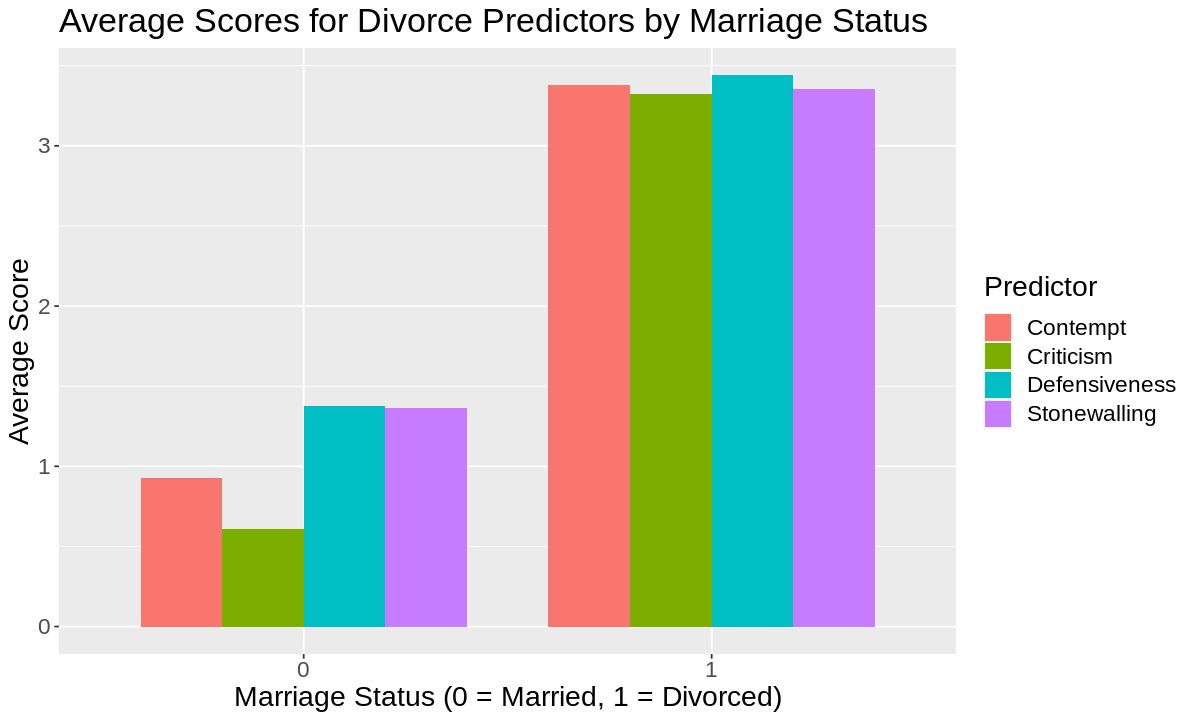

In [44]:
# The training data is summarized into a table that shows the mean of the 4 variables separated into class(1 meaning divorced and 0 meaning married)
summary_divorce <- divorce_train |>
                    group_by(Divorce) |>
                    summarise(across(c("Criticism", "Contempt", "Defensiveness", "Stonewalling"), ~mean(.x, na.rm = TRUE)))
summary_divorce
# A pivot table is created from the summarized data to group the 4 predictors under a column and corresponding average scores under another to aid in data visualization
divorce_train_longer <- summary_divorce |>
                          pivot_longer(cols = -Divorce, names_to = "Predictor", values_to = "Score")

options(repr.plot.width=10, repr.plot.height=6)
# Creating a bar graph showing average scores across the divorce predictors, grouped by marriage status
divorce_train_plot <- ggplot(divorce_train_longer, aes(x = Divorce, y = Score, fill = Predictor)) +
                        geom_bar(stat = "identity", position = "dodge", width = 0.8) +
                        labs(x = "Marriage Status (0 = Married, 1 = Divorced)", y = "Average Score", fill = "Predictor") +
                        ggtitle("Average Scores for Divorce Predictors by Marriage Status")+
                        theme(text = element_text(size=17))
divorce_train_plot


**Figure 1:** The graph above shows visualization of average scores across the four divorce predictors for marriage status. The data consists of a sample of individuals categorized as either "Married" or "Divorced." The pivot_longer() function was used to reshape the data from wide to long format, facilitating the plotting process.

The data is plotted using a bar plot and provides a clear comparison of the average scores (y-axis) for each divorce predictor between the two marriage status groups (x-axis). Each of the predictors are differentiated by different colours for easy visual comparison. The bar plot effectively illustrates any differences or similarities in the scores, aiding in the understanding of the relationship between divorce predictors and marital status.

In [11]:
class(divorce_train)

[1] "tbl_df"     "tbl"        "data.frame"

In [32]:
folds <- vfold_cv(divorce_train, v = 5, strata = Divorce)

fold_lengths <- lengths(folds$splits)
fold_lengths

[1] 4 4 4 4 4

In [33]:
divorce_recipe <- recipe(Divorce ~ Criticism + Contempt + Defensiveness + Stonewalling, data = divorce_train)|>
 step_normalize(Criticism , Contempt , Defensiveness, Stonewalling)

knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune("neighbors")) |>
                             set_engine("kknn") |>
                             set_mode("classification")
print(knn_spec)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
               add_recipe(divorce_recipe) |>
               add_model(knn_spec) |>
               tune_grid(resamples = folds, grid = k_vals)|>
               collect_metrics()

accuracies <- knn_results |>
              filter(.metric == "accuracy")
accuracies

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune("neighbors")
  weight_func = rectangular

Computational engine: kknn 



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9455128,5,0.025999102,Preprocessor1_Model01
6,accuracy,binary,0.9685897,5,0.007877055,Preprocessor1_Model02
11,accuracy,binary,0.9608974,5,0.012179487,Preprocessor1_Model03
16,accuracy,binary,0.9608974,5,0.012179487,Preprocessor1_Model04
21,accuracy,binary,0.9608974,5,0.012179487,Preprocessor1_Model05
26,accuracy,binary,0.9608974,5,0.012179487,Preprocessor1_Model06
31,accuracy,binary,0.9528974,5,0.007478613,Preprocessor1_Model07
36,accuracy,binary,0.9528974,5,0.007478613,Preprocessor1_Model08
41,accuracy,binary,0.9608974,5,0.012179487,Preprocessor1_Model09


**Determining the Best K-value - Cross-Validation Plot**

Cross-validation plot depicts k values ranging from 1 to 96 to determine the K value with the highest accuracy. The x-axis shows the range of possible K values to identify nearest neighbors that would underfit or overfit the training data and give us the K-value that would have the highest accuracy.


[1] 6

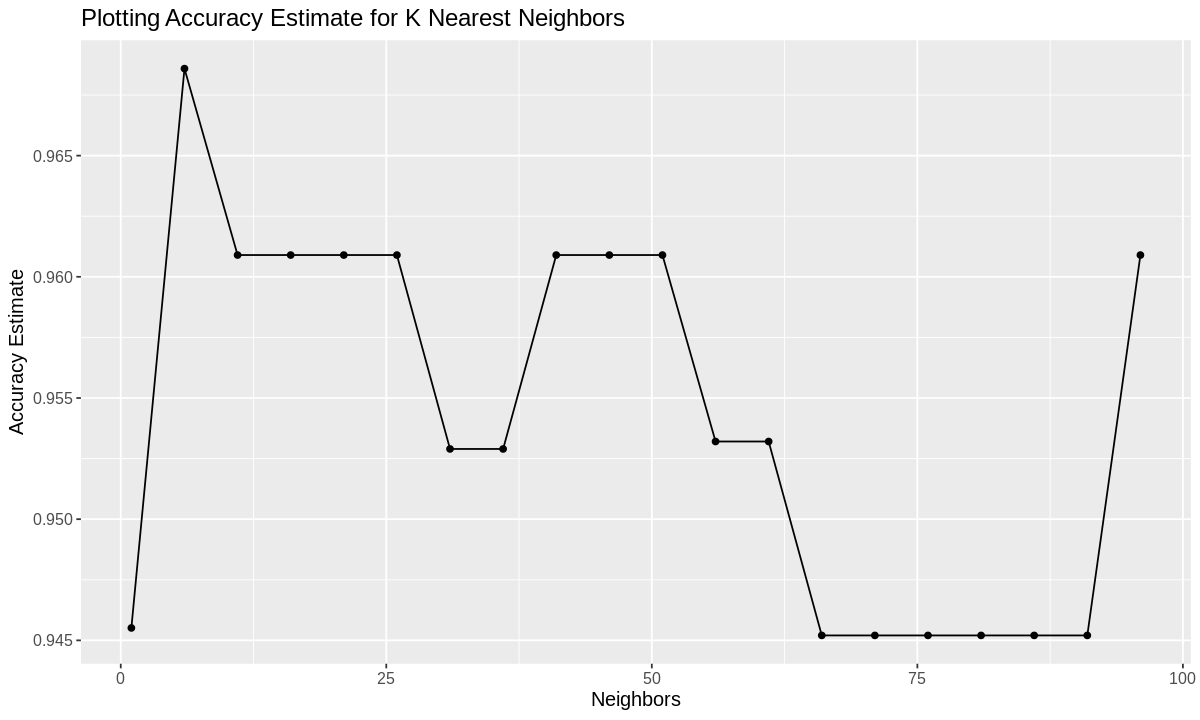

In [40]:
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      ggtitle("Plotting Accuracy Estimate for K Nearest Neighbors")+
      theme(text = element_text(size = 12))

accuracy_versus_k
 # determining k with highest accuracy estimate
k_max <- accuracies |>
         arrange(desc(mean)) |>
         slice(1) |>
        pull(neighbors)
k_max

**Figure 2**: According to our cross-validation plot, the best K-value, giving us the highest accuracy estimate, is K=1. Generally, K = 1 is indicative of a model being too influenced by the training data, and therefore overfit the data. In our model, this could be a result of insufficient data available to the model but we will use K = 1 to train the model as we have limited data from the database. 

**Training Model with K = 1**

In [17]:
knn_best <- nearest_neighbor(weight_func = "rectangular", neighbors = 1) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_final <- workflow() |>
  add_recipe(divorce_recipe) |>
  add_model(knn_best)

knn_final_fit <- fit(knn_final, data = divorce_train)



**Prediction of Accuracy and Confusion Matrix** 

Cross-validation helps us evaluate the accuracy of our classifier, we can use cross-validation to calculate an accuracy for our determined value of K.

In [18]:
predict_final <- predict(knn_final_fit, divorce_test) |>
                    bind_cols(divorce_test) |>
                    metrics(truth = Divorce, estimate = .pred_class) |>
                    filter(.metric == "accuracy")
predict_final

confmatrix_final <- predict(knn_final_fit, divorce_test) |>
                    bind_cols(divorce_test) |>
                    conf_mat(truth = Divorce, estimate = .pred_class)
confmatrix_final

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9534884


          Truth
Prediction  0  1
         0 21  1
         1  1 20

The accuracy of our model is about 95.3% which is reliable enough to test marriage status using our predictors. The confusion matrix shows 21 observations predicting marriage and 20 observations predicting divorce correctly and only classified one observation as marriage when it should have been divorce and one observation as divorce when it should have been marriage. Overall, the model performed well when evaluated with accuracy and a confusion matrix. 

**Testing Model with New Data**

In [19]:
# Hypothetical test scores to evaluate results obtained from model
new_data <- data.frame (Defensiveness = 3, Contempt = 2.5, Criticism = 2, Stonewalling = 1)
new_data
# Results from the Model: 1 = Divorce, 0 = Married 
predictions <- predict(knn_final_fit, new_data)
print(predictions)

Defensiveness,Contempt,Criticism,Stonewalling
<dbl>,<dbl>,<dbl>,<dbl>
3,2.5,2,1


# A tibble: 1 × 1
  .pred_class
  <fct>      
1 1          
